In [73]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

- p≤0.001: ***
- p≤0.01: **
- p≤0.05: *

# Visualization 1
* içindeki güncelmiş masterda


In [152]:
"""
list_columns = pd.read_csv("../stats/stats_ml1m_age.csv",  index_col=0).columns

selected_dc = ['Number of Users', 'Number of Items', 'Number of Ratings', 'Shape', 'Rating per User', 'Rating per Item', 'Long Tail Items']

set(list_columns) - set(selected_dc)"""

'\nlist_columns = pd.read_csv("../stats/stats_ml1m_age.csv",  index_col=0).columns\n\nselected_dc = [\'Number of Users\', \'Number of Items\', \'Number of Ratings\', \'Shape\', \'Rating per User\', \'Rating per Item\', \'Long Tail Items\']\n\nset(list_columns) - set(selected_dc)'

In [207]:
df_regression = pd.read_csv("df_regression.csv",  index_col=0)
df_regression

,Model Name,Dataset,Subset ID,Is Filtered,Sensitive Feature,ndcg@5,recall@5,mrr@5,Differential Fairness of sensitive attribute,giniindex@5,...,Standart Deviation of Long Tail Items,Skewness of Long Tail Items,Kurtosis of Long Tail Items,Mean Rating,Standart Deviation of Rating,Skewness of Rating,Kurtosis of Rating,Sensitive Attribute == 0 Percentage,Sensitive Attribute == 1 Percentage,Difference between Sensitive Attribute Percentage
0,FOCF,BX,1,Yes,Age,0.189,0.258,0.182,2.115,0.941,...,0.202,1.576,2.843,1.992,1.529,1.035,-0.689,39.46,60.54,21.08
1,FOCF,BX,2,Yes,Age,0.192,0.264,0.186,3.482,0.948,...,0.175,1.878,4.524,2.005,1.534,1.013,-0.737,39.79,60.21,20.42
2,FOCF,BX,3,Yes,Age,0.209,0.284,0.199,3.293,0.942,...,0.191,1.791,3.828,2.029,1.547,0.980,-0.806,39.16,60.84,21.68
3,FOCF,BX,4,Yes,Age,0.199,0.266,0.195,2.533,0.948,...,0.194,1.673,3.245,1.997,1.531,1.027,-0.708,39.48,60.52,21.04
4,FOCF,BX,5,Yes,Age,0.190,0.249,0.197,2.733,0.955,...,0.146,1.736,4.651,2.013,1.539,1.001,-0.763,39.11,60.89,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,PFCN_MLP,ml1m,98,Yes,Gender,0.256,0.252,0.349,2.938,0.967,...,0.135,2.348,8.022,3.552,1.135,-0.530,-0.414,71.20,28.80,42.40
896,PFCN_MLP,ml1m,99,Yes,Age,0.245,0.321,0.262,3.268,0.946,...,0.160,1.939,5.022,3.627,1.107,-0.575,-0.335,23.68,76.32,52.64
897,PFCN_MLP,ml1m,99,Yes,Gender,0.265,0.330,0.287,2.943,0.947,...,0.160,1.939,5.022,3.627,1.107,-0.575,-0.335,69.76,30.24,39.52
898,PFCN_MLP,ml1m,100,Yes,Age,0.254,0.272,0.326,3.117,0.963,...,0.137,1.923,4.917,3.540,1.124,-0.536,-0.376,21.86,78.14,56.28


# Research Question 1
### Bir recsys’in fairnessını etkileyen faktörler (data ve model karakteristikleri) nelerdir ?

    1. Önce genel.girdi: fairness metrikler hariç her şey. target = fairness measureları (her measure için ayrı ayrı regression yapılacak)
    2. fairness metrik sayımız kadar model çalışacak. target değerimiz hep farklı fairness metrikleri olacak bu durumda her fairness metrik için farklı değerler önemli olabilir sonucuna varabiliriz

In [286]:
# burada diğer model based çalıştırmak için OLS_Regression_Feature_Analysis_fairness_measure_based_modeladı eklenebilir.
df = pd.read_excel("OLS_Regression_Feature_Analysis_fairness_measure_based.xlsx")
#_PFCN_MLP

In [277]:
df["Target Measure"].unique()

array(['Value Unfairness', 'Overrestimation Unfairness',
       'Differential Fairness', 'Generalized Cross Entropy',
       'KS Statistic of sensitive attribute'], dtype=object)

In [278]:
df.columns

Index(['Feature', 'Coefficient', 'P-Value', 'Significance', 'Target Measure'], dtype='object')

In [279]:
df.Feature.unique()

array(['Sensitive Feature_Age', 'Sensitive Feature_Gender',
       'Dataset_ml1m', 'Dataset_BX', 'Number of Items',
       'Standart Deviation of Rating', 'Shape',
       'Skewness of Popularity Bias', 'Gini User',
       'Difference between Sensitive Attribute Percentage', 'Density',
       'hit@5', 'Number of Users', 'Model Name_NFCF',
       'Model Name_PFCN_MLP', 'Model Name_FOCF', 'const'], dtype=object)

In [280]:
df[(df["Feature"]=="Difference between Sensitive Attribute Percentage")]

,Feature,Coefficient,P-Value,Significance,Target Measure
9,Difference between Sensitive Attribute Percentage,-0.010194,6.624543e-01,NaN,Value Unfairness
28,Difference between Sensitive Attribute Percentage,-0.038902,1.871403e-01,NaN,Overrestimation Unfairness
43,Difference between Sensitive Attribute Percentage,0.333671,3.069644e-01,NaN,Differential Fairness
63,Difference between Sensitive Attribute Percentage,-0.286487,3.210976e-31,***,Generalized Cross Entropy
74,Difference between Sensitive Attribute Percentage,0.031719,2.112908e-01,NaN,KS Statistic of sensitive attribute


In [281]:
df[(df["Feature"]=="Rating per User")]

,Feature,Coefficient,P-Value,Significance,Target Measure


In [282]:
df[(df["Feature"]=="hit@5")]

,Feature,Coefficient,P-Value,Significance,Target Measure
11,hit@5,-0.037709,1.079645e-07,***,Value Unfairness
25,hit@5,0.045168,4.524829e-07,***,Overrestimation Unfairness
40,hit@5,0.684662,6.790564e-12,***,Differential Fairness
57,hit@5,-0.007090,3.216612e-01,NaN,Generalized Cross Entropy
75,hit@5,0.017490,2.239762e-02,*,KS Statistic of sensitive attribute


In [283]:
df["Is Important"] = df["Significance"].notna()
total_target_measures = df["Target Measure"].nunique()

importance_analysis = df.groupby("Feature").agg(
    Total_Target_Measures=("Target Measure", "nunique"),
    Important_Target_Measures=("Is Important", "sum"),
    Importance_Percentage=("Is Important", lambda x: x.sum() / total_target_measures * 100),
).reset_index()

importance_analysis = importance_analysis.sort_values(by="Importance_Percentage", ascending=False)
importance_analysis

,Feature,Total_Target_Measures,Important_Target_Measures,Importance_Percentage
8,Number of Items,5,5,100.0
12,Shape,5,4,80.0
16,hit@5,5,4,80.0
9,Number of Users,5,3,60.0
2,Density,5,3,60.0
4,Gini User,5,2,40.0
3,Difference between Sensitive Attribute Percentage,5,1,20.0
13,Skewness of Popularity Bias,5,1,20.0
14,Standart Deviation of Rating,5,1,20.0
5,Model Name_FOCF,5,0,0.0


In [285]:
significance_levels = df.groupby("Feature").agg(
    **{"*** (p ≤ 0.001)": ("P-Value", lambda x: (x <= 0.001).sum()),
       "** (0.001 < p ≤ 0.01)": ("P-Value", lambda x: ((x > 0.001) & (x <= 0.01)).sum()),
       "* (0.01 < p ≤ 0.05)": ("P-Value", lambda x: ((x > 0.01) & (x <= 0.05)).sum())}
)

importance_analysis_with_significance = importance_analysis.merge(significance_levels, on="Feature")
importance_analysis_with_significance

,Feature,Total_Target_Measures,Important_Target_Measures,Importance_Percentage,*** (p ≤ 0.001),** (0.001 < p ≤ 0.01),* (0.01 < p ≤ 0.05)
0,Number of Items,5,5,100.0,4,1,0
1,Shape,5,4,80.0,3,1,0
2,hit@5,5,4,80.0,3,0,1
3,Number of Users,5,3,60.0,3,0,0
4,Density,5,3,60.0,3,0,0
5,Gini User,5,2,40.0,2,0,0
6,Difference between Sensitive Attribute Percentage,5,1,20.0,1,0,0
7,Skewness of Popularity Bias,5,1,20.0,0,0,1
8,Standart Deviation of Rating,5,1,20.0,1,0,0
9,Model Name_FOCF,5,0,0.0,0,0,0


In [144]:
def func(sign, coeff):
    if sign in ["*","**","***"]:
        return coeff
    else:
        return "Not Significant"
df["pivot_cell_info"] = df.apply(lambda x: func(x["Significance"],x["Coefficient"]), axis=1)

df_pivot = pd.pivot_table(df, values="pivot_cell_info", index="Feature", columns="Target Measure", aggfunc="first")
pivot_data_filtered = df_pivot[df_pivot.apply(lambda row: (row == "Not Significant").sum() < 6, axis=1)]
pivot_data_filtered

Target Measure,Differential Fairness of sensitive attribute,Generalized Cross Entropy,NonParity Unfairness,Overestimation Unfairness,Value Unfairness
Feature,,,,,
Dataset_BX,Not Significant,Not Significant,Not Significant,Not Significant,Not Significant
Dataset_ml1m,Not Significant,Not Significant,Not Significant,Not Significant,Not Significant
Difference between Sensitive Attribute Percentage,0.782407,-0.296875,Not Significant,Not Significant,Not Significant
Model Name_FOCF,Not Significant,Not Significant,Not Significant,Not Significant,Not Significant
Model Name_NFCF,Not Significant,Not Significant,Not Significant,Not Significant,Not Significant
Model Name_PFCN_MLP,Not Significant,Not Significant,Not Significant,Not Significant,Not Significant
Number of Items,2.11426,-0.047045,Not Significant,0.098933,0.150553
Number of Ratings,-2.202252,0.081159,Not Significant,-0.216048,-0.211616
Number of Users,1.139464,-0.051903,Not Significant,0.186137,0.072789


# Research Question 2
### Modelimizin başarısı ile fairness’ı arasında ilişki var mı? Fairness measureımız accuracy’e etki ediyor mu ?
    1. bunun için target değerimiz accuracy(biri seçilsin), girdi: accuracy metrikler hariç her şey.

In [203]:
df_2 = pd.read_excel("OLS_Regression_Feature_Analysis_accuracy_metric_based.xlsx")

In [204]:
df_2 = df_2[df_2["Target Measure"]=="hit@5"]

In [205]:
df_2[(df_2["Target Measure"]=="hit@5") & (df_2["Significance"].isin(["*","**","***"]))]

,Feature,Coefficient,P-Value,Significance,Target Measure
67,Differential Fairness of sensitive attribute,0.252453,3.307947e-12,***,hit@5
68,Rating per Item,0.198175,2.889672e-05,***,hit@5
69,NonParity Unfairness of sensitive attribute,0.108307,7.685305e-06,***,hit@5
79,Value Unfairness of sensitive attribute,-0.076890,1.942318e-02,*,hit@5


In [206]:
df_2["Is Important"] = df_2["Significance"].notna()
total_target_measures = df_2["Target Measure"].nunique()

importance_analysis = df_2.groupby("Feature").agg(
    Total_Target_Measures=("Target Measure", "nunique"),
    Important_Target_Measures=("Is Important", "sum"),
    Importance_Percentage=("Is Important", lambda x: x.sum() / total_target_measures * 100),
).reset_index()

importance_analysis_2 = importance_analysis.sort_values(by="Importance_Percentage", ascending=False)
importance_analysis_2

,Feature,Total_Target_Measures,Important_Target_Measures,Importance_Percentage
19,Value Unfairness of sensitive attribute,1,1,100.0
3,Differential Fairness of sensitive attribute,1,1,100.0
8,NonParity Unfairness of sensitive attribute,1,1,100.0
13,Rating per Item,1,1,100.0
0,Dataset_BX,1,0,0.0
12,Overestimation Unfairness of sensitive attribute,1,0,0.0
18,Skewness of Long Tail Items,1,0,0.0
17,Shape,1,0,0.0
16,Sensitive Feature_Gender,1,0,0.0
15,Sensitive Feature_Age,1,0,0.0


# Regression harici analizler


In [254]:
df_regression = pd.read_csv("df_regression.csv",  index_col=0)
df = df_regression.copy()

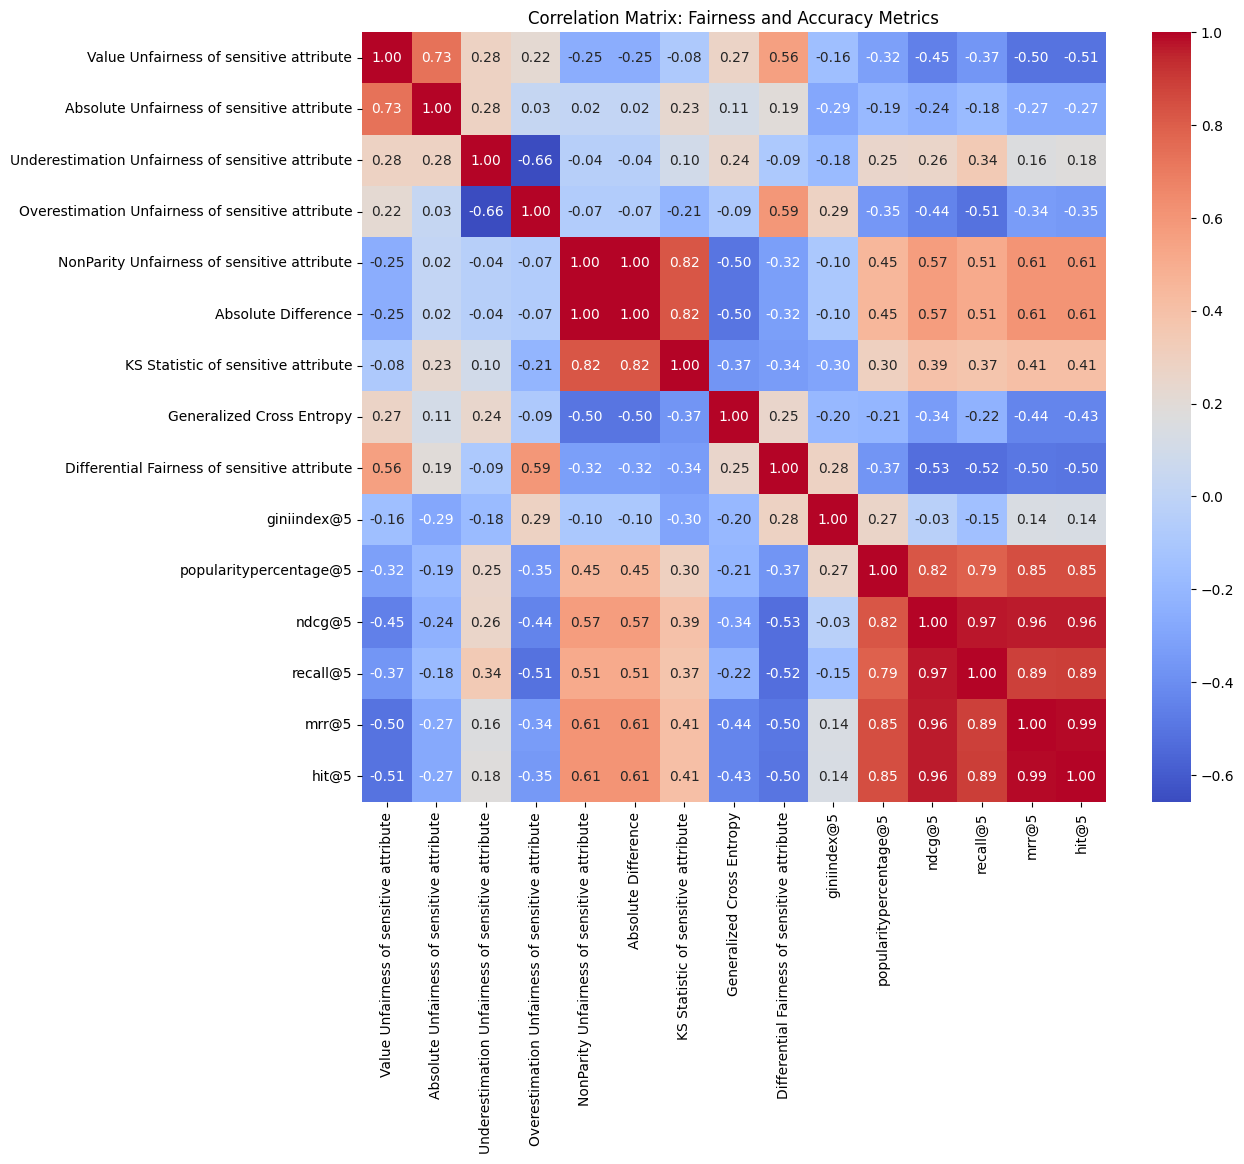

In [258]:

# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute',
    'giniindex@5',
       'popularitypercentage@5'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Select columns for fairness and accuracy metrics
selected_columns = fairness_measures + accuracy_metrics
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix: Fairness and Accuracy Metrics")
plt.show()

In [255]:
df.columns

Index(['Model Name', 'Dataset', 'Subset ID', 'Is Filtered',
       'Sensitive Feature', 'ndcg@5', 'recall@5', 'mrr@5',
       'Differential Fairness of sensitive attribute', 'giniindex@5',
       'popularitypercentage@5', 'Value Unfairness of sensitive attribute',
       'Absolute Unfairness of sensitive attribute',
       'Underestimation Unfairness of sensitive attribute',
       'Overestimation Unfairness of sensitive attribute',
       'NonParity Unfairness of sensitive attribute', 'Absolute Difference',
       'KS Statistic of sensitive attribute', 'Generalized Cross Entropy',
       'hit@5', 'Number of Users', 'Number of Items', 'Number of Ratings',
       'Space Size', 'Shape', 'Density', 'Rating per User', 'Rating per Item',
       'Gini Item', 'Gini User', 'Average Popularity',
       'Standart Deviation of Popularity Bias', 'Skewness of Popularity Bias',
       'Kurtosis of Popularity Bias', 'Average Long Tail Items',
       'Standart Deviation of Long Tail Items', 'Skewness 

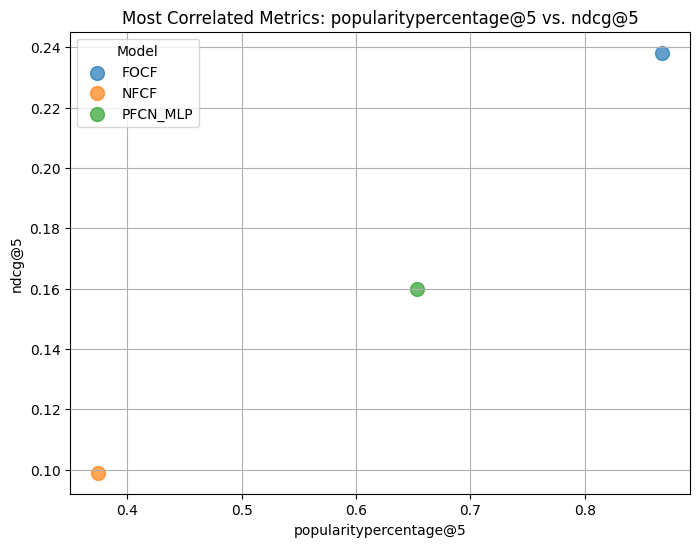

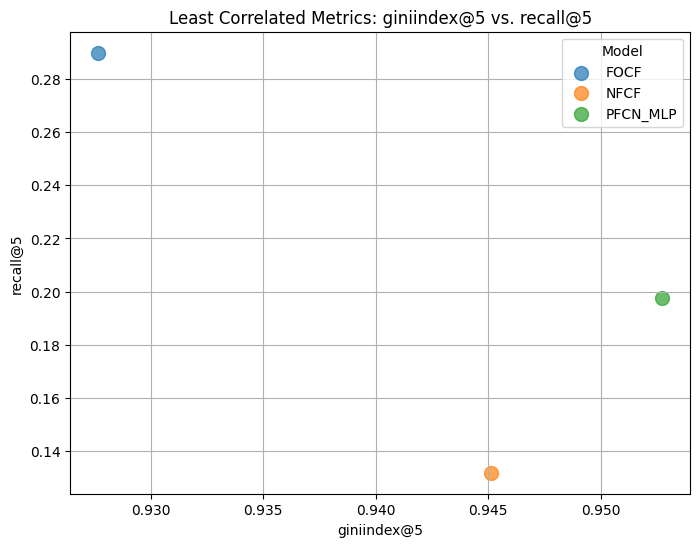

AttributeError: 'MultiIndex' object has no attribute '_data'

<Figure size 1000x800 with 0 Axes>

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute',
    'giniindex@5',
       'popularitypercentage@5'
    
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Compute correlation matrix
correlations = df[fairness_measures + accuracy_metrics].corr()

# Isolate fairness vs. accuracy correlations
fairness_vs_accuracy_corr = correlations.loc[fairness_measures, accuracy_metrics].abs()

# Identify the most and least correlated metric pairs
most_correlated = fairness_vs_accuracy_corr.stack().idxmax()
least_correlated = fairness_vs_accuracy_corr.stack().idxmin()

# Extract the metrics
most_corr_fairness, most_corr_accuracy = most_correlated
least_corr_fairness, least_corr_accuracy = least_correlated

# Calculate averages for each model (include all metrics this time)
model_averages = df.groupby("Model Name")[
    fairness_measures + accuracy_metrics
].mean()

# Calculate averages for each model-sensitive feature pair
model_sensitive_averages = df.groupby(["Model Name", "Sensitive Feature"])[
    fairness_measures + accuracy_metrics
].mean()

# Scatter plots with different colors for models
plt.figure(figsize=(8, 6))
for model_name, data in model_averages.iterrows():
    plt.scatter(
        data[most_corr_fairness],
        data[most_corr_accuracy],
        label=model_name,
        s=100,
        alpha=0.7
    )
plt.title(f"Most Correlated Metrics: {most_corr_fairness} vs. {most_corr_accuracy}")
plt.xlabel(most_corr_fairness)
plt.ylabel(most_corr_accuracy)
plt.legend(title="Model")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
for model_name, data in model_averages.iterrows():
    plt.scatter(
        data[least_corr_fairness],
        data[least_corr_accuracy],
        label=model_name,
        s=100,
        alpha=0.7
    )
plt.title(f"Least Correlated Metrics: {least_corr_fairness} vs. {least_corr_accuracy}")
plt.xlabel(least_corr_fairness)
plt.ylabel(least_corr_accuracy)
plt.legend(title="Model")
plt.grid()
plt.show()

# Scatter plot for model-sensitive feature pairs
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=most_corr_fairness,
    y=most_corr_accuracy,
    hue=model_sensitive_averages.index,
    style=model_sensitive_averages.index,
    s=100,
    data=model_sensitive_averages
)
plt.title(f"Most Correlated Metrics by Model-Sensitive Feature: {most_corr_fairness} vs. {most_corr_accuracy}")
plt.xlabel(most_corr_fairness)
plt.ylabel(most_corr_accuracy)
plt.legend(title="Model-Sensitive Feature")
plt.grid()
plt.show()

# Display the table of averaged metrics for each model
print("Averaged Metrics for Each Model:")
print(model_averages)

# Display the table of averaged metrics for model-sensitive feature pairs
print("Averaged Metrics for Model-Sensitive Feature Pairs:")
print(model_sensitive_averages)



### ChatGPT önerisi

In [120]:
import pandas as pd
import numpy as np

# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Calculate model-wise averages
model_averages = df.groupby("Model Name")[fairness_measures + accuracy_metrics].mean()

# Normalize fairness and accuracy metrics (Min-Max normalization)
normalized_data = (model_averages - model_averages.min()) / (model_averages.max() - model_averages.min())

# Separate normalized fairness and accuracy metrics
normalized_fairness = normalized_data[fairness_measures]
normalized_accuracy = normalized_data[accuracy_metrics]

# Calculate overall scores: fairness (lower is better) and accuracy (higher is better)
fairness_score = 1 - normalized_fairness.mean(axis=1)  # Invert fairness scores to align with "higher is better"
accuracy_score = normalized_accuracy.mean(axis=1)

# Combine scores into a single ranking
combined_score = (fairness_score + accuracy_score) / 2

# Add scores to the model averages
model_averages['Fairness Score'] = fairness_score
model_averages['Accuracy Score'] = accuracy_score
model_averages['Combined Score'] = combined_score

# Sort models by combined score
ranked_models = model_averages.sort_values(by='Combined Score', ascending=False)

# Display the ranked models
print("Ranked Models Based on Fairness and Accuracy:")
print(ranked_models)

# Save results to CSV (optional)
ranked_models.to_csv("ranked_models_fairness_accuracy.csv", index=True)


Ranked Models Based on Fairness and Accuracy:
            Value Unfairness of sensitive attribute  \
Model Name                                            
FOCF                                       0.328451   
PFCN_MLP                                   0.346224   
NFCF                                       0.377978   

            Absolute Unfairness of sensitive attribute  \
Model Name                                               
FOCF                                          0.278865   
PFCN_MLP                                      0.256189   
NFCF                                          0.297257   

            Underestimation Unfairness of sensitive attribute  \
Model Name                                                      
FOCF                                                 0.266579   
PFCN_MLP                                             0.113531   
NFCF                                                 0.103344   

            Overestimation Unfairness of sensitive attribute 

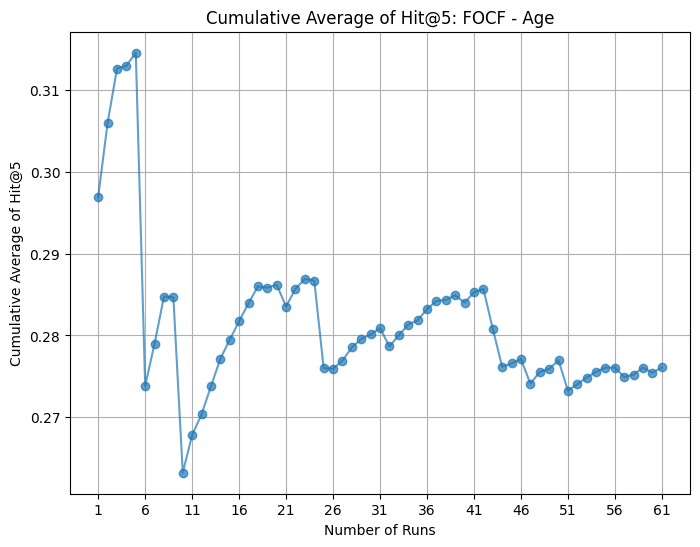

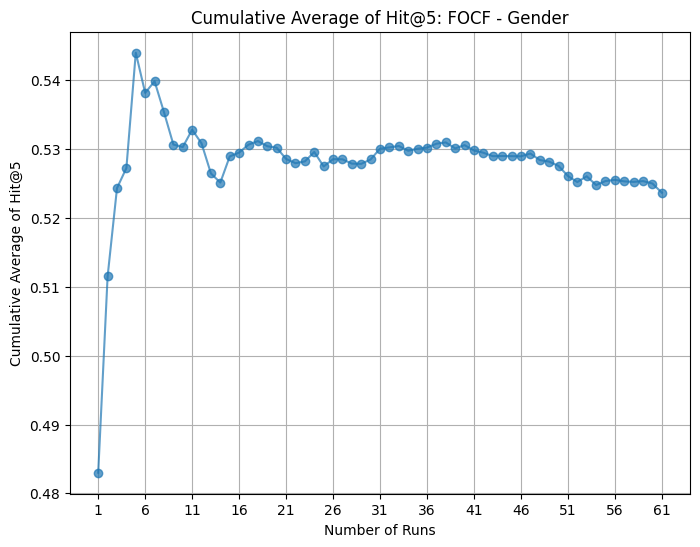

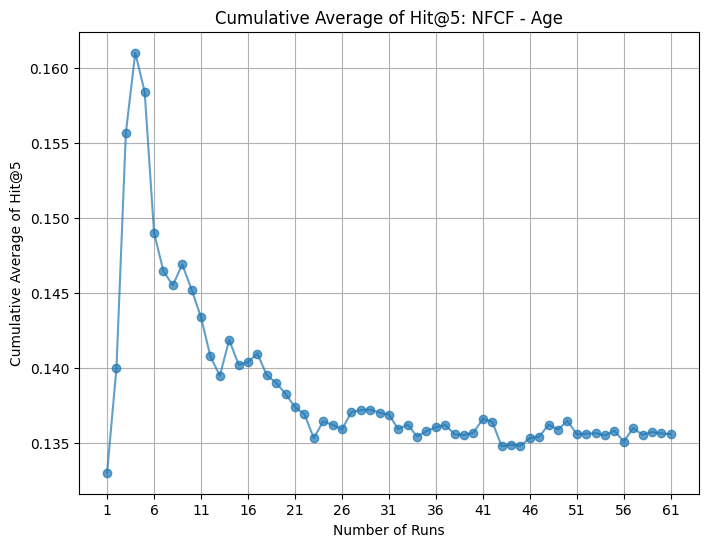

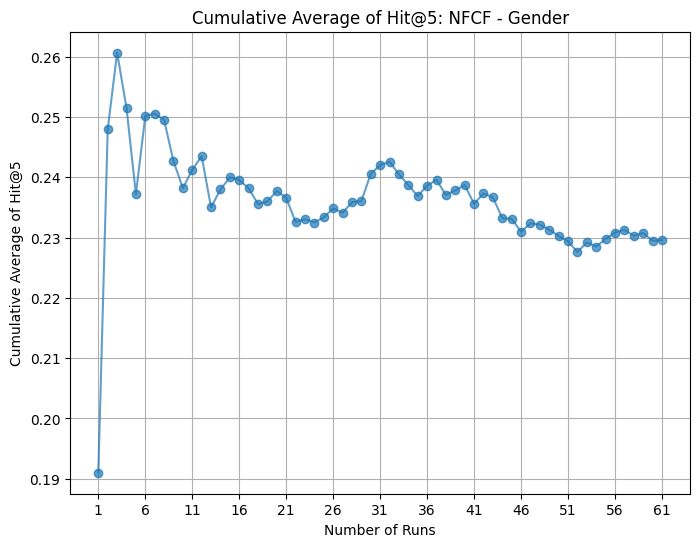

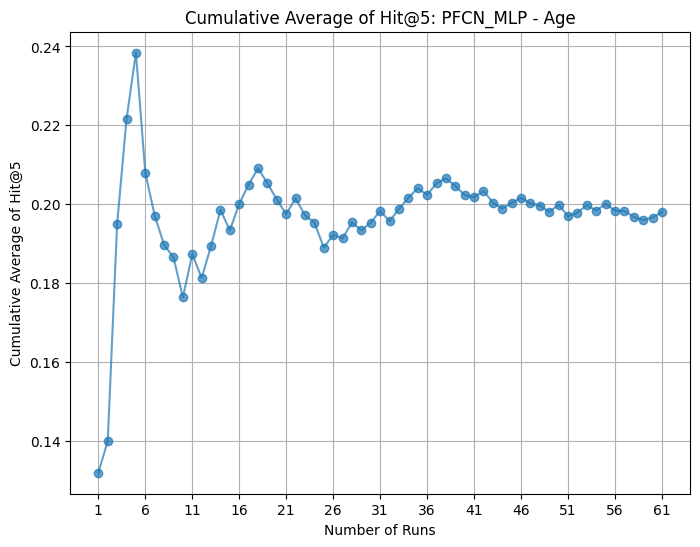

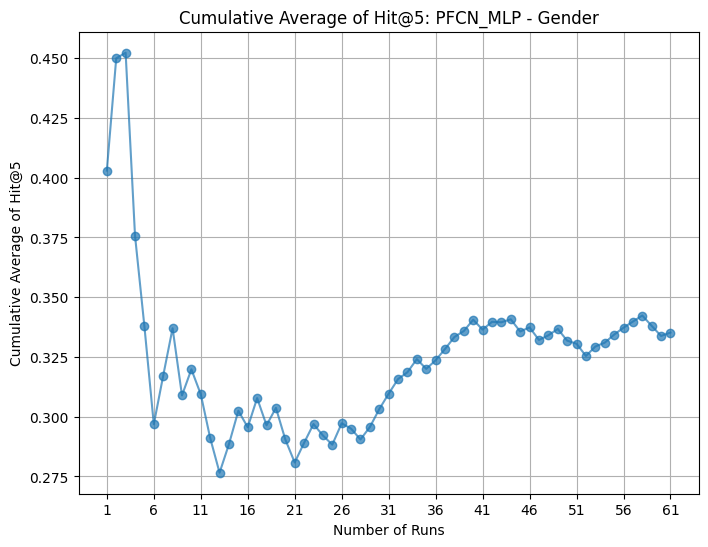

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Group data by model name and sensitive feature
grouped_data = df.groupby(["Model Name", "Sensitive Feature"])

# Set the maximum number of ticks (e.g., 61)
max_ticks = 61

# Create cumulative average plots
for (model_name, sensitive_feature), group in grouped_data:
    # Sort and reset index for consistency
    group = group.sort_index().reset_index()

    # Ensure we have at least `max_ticks` rows
    if len(group) < max_ticks:
        continue

    # Calculate cumulative averages for `hit@5`
    cumulative_avg = group['hit@5'].iloc[:max_ticks].expanding().mean()

    # Plot the cumulative average
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_ticks + 1), cumulative_avg, marker='o', alpha=0.7)
    plt.title(f"Cumulative Average of Hit@5: {model_name} - {sensitive_feature}")
    plt.xlabel("Number of Runs")
    plt.ylabel("Cumulative Average of Hit@5")
    plt.xticks(range(1, max_ticks + 1, 5))  # Set ticks every 5 steps for clarity
    plt.grid()
    plt.show()


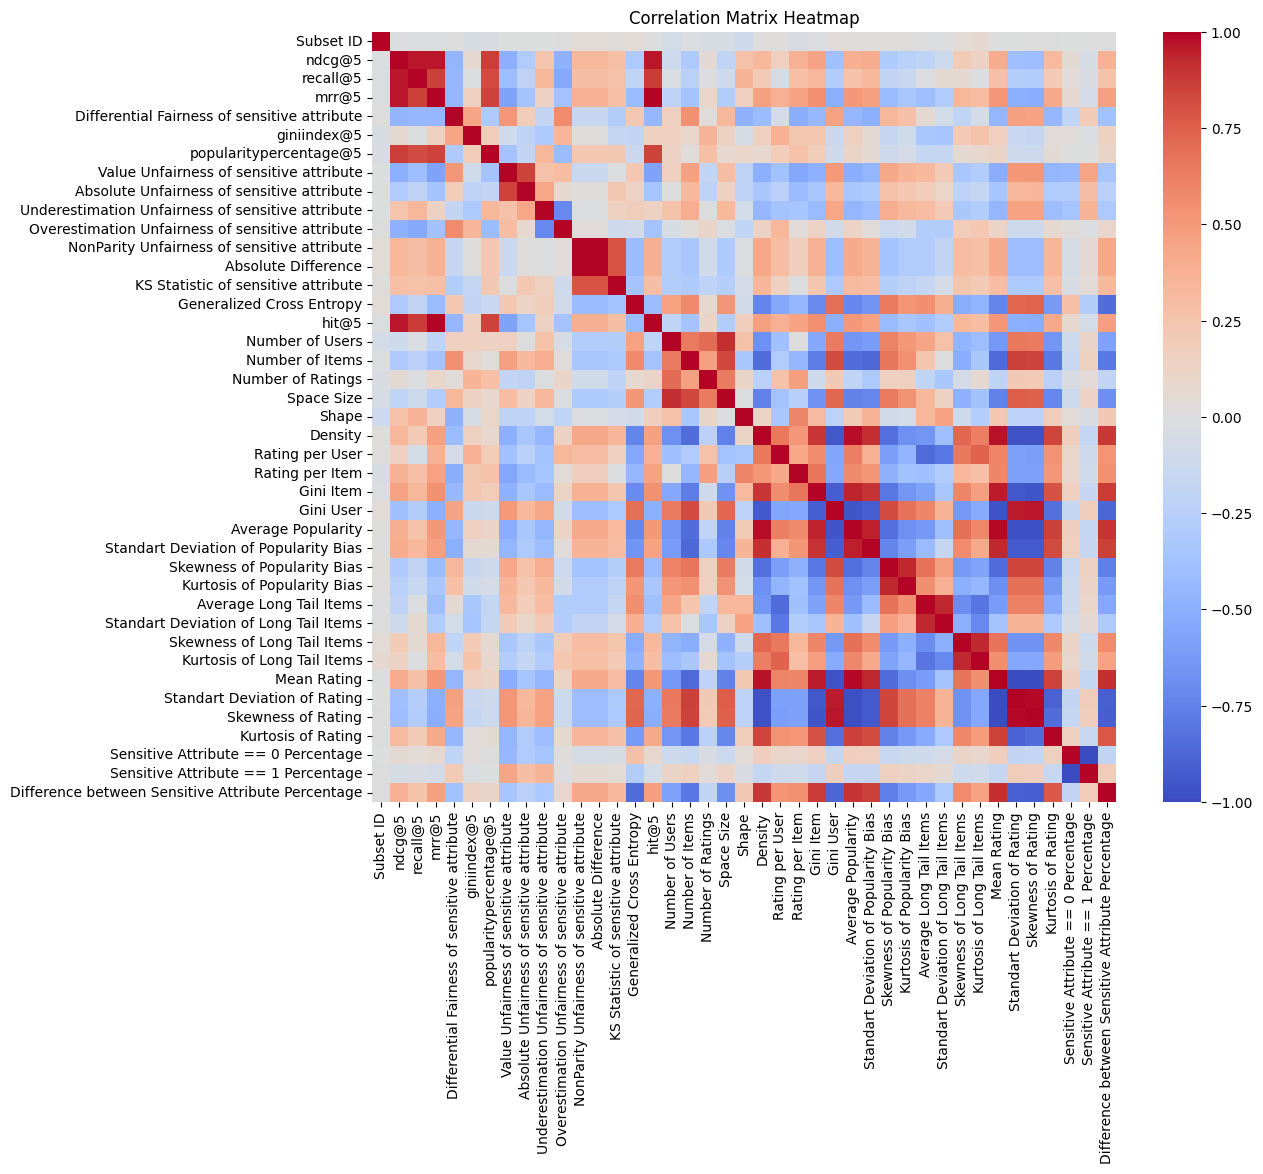

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False,  cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

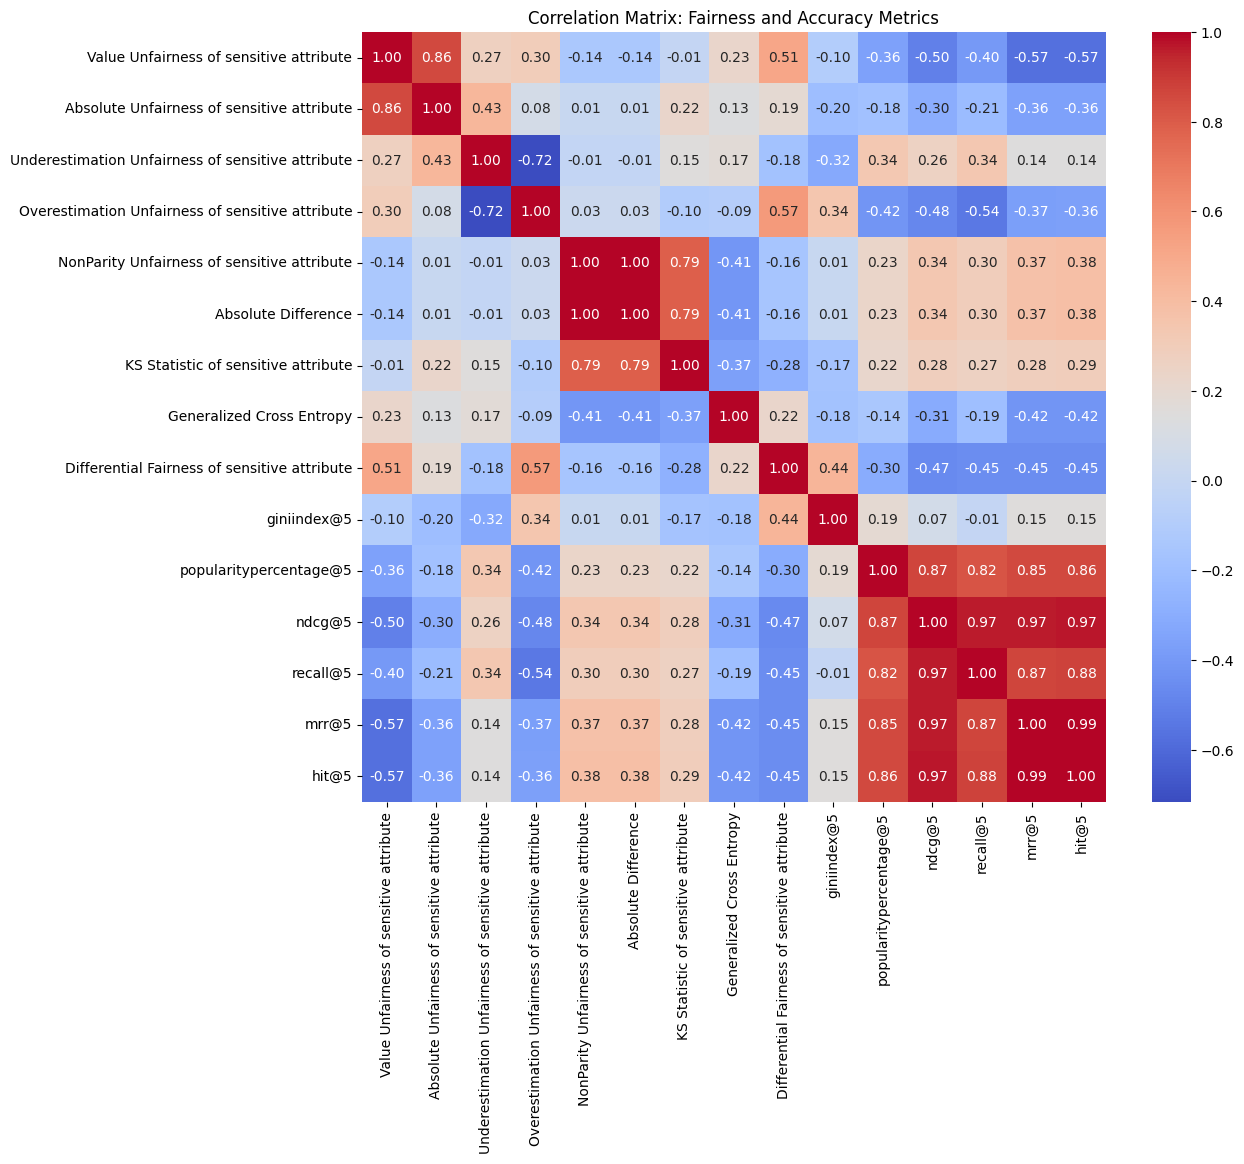

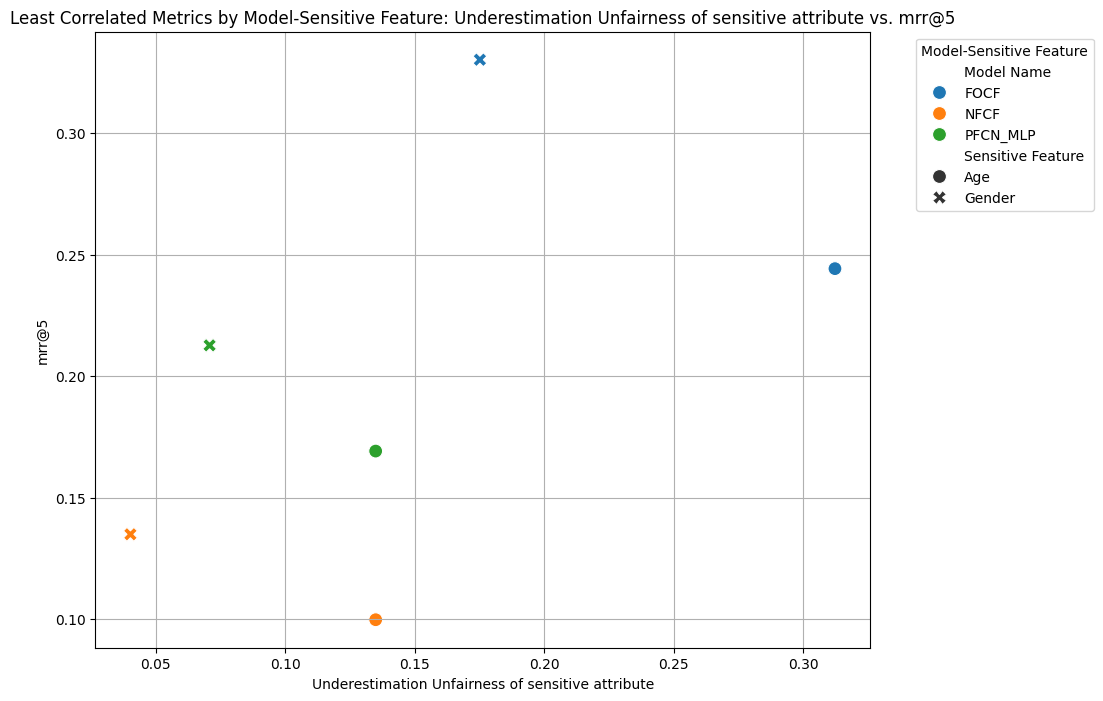

In [124]:
# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Compute correlation matrix and find least correlated metrics
correlations = df[fairness_measures + accuracy_metrics].corr()
fairness_vs_accuracy_corr = correlations.loc[fairness_measures, accuracy_metrics].abs()
least_correlated = fairness_vs_accuracy_corr.stack().idxmin()
least_corr_fairness, least_corr_accuracy = least_correlated

# Calculate averages for each model-sensitive feature pair
model_sensitive_averages = df.groupby(["Model Name", "Sensitive Feature"])[
    fairness_measures + accuracy_metrics
].mean()

# Scatter plot for least correlated metrics by model-sensitive feature
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=model_sensitive_averages[least_corr_fairness],
    y=model_sensitive_averages[least_corr_accuracy],
    hue=model_sensitive_averages.index.get_level_values(0),  # Model Name
    style=model_sensitive_averages.index.get_level_values(1),  # Sensitive Feature
    s=100
)
plt.title(f"Least Correlated Metrics by Model-Sensitive Feature: {least_corr_fairness} vs. {least_corr_accuracy}")
plt.xlabel(least_corr_fairness)
plt.ylabel(least_corr_accuracy)
plt.legend(title="Model-Sensitive Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

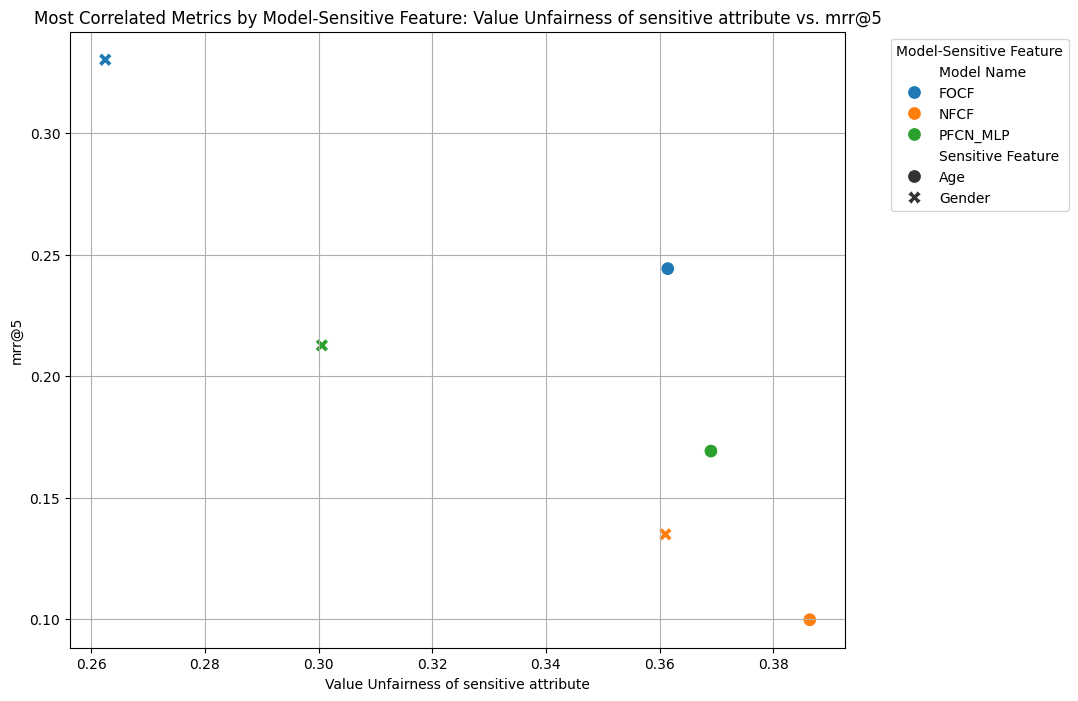

In [125]:

# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Compute correlation matrix and find most correlated metrics
correlations = df[fairness_measures + accuracy_metrics].corr()
fairness_vs_accuracy_corr = correlations.loc[fairness_measures, accuracy_metrics].abs()
most_correlated = fairness_vs_accuracy_corr.stack().idxmax()
most_corr_fairness, most_corr_accuracy = most_correlated

# Calculate averages for each model-sensitive feature pair
model_sensitive_averages = df.groupby(["Model Name", "Sensitive Feature"])[
    fairness_measures + accuracy_metrics
].mean()

# Scatter plot for most correlated metrics by model-sensitive feature
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=model_sensitive_averages[most_corr_fairness],
    y=model_sensitive_averages[most_corr_accuracy],
    hue=model_sensitive_averages.index.get_level_values(0),  # Model Name
    style=model_sensitive_averages.index.get_level_values(1),  # Sensitive Feature
    s=100
)
plt.title(f"Most Correlated Metrics by Model-Sensitive Feature: {most_corr_fairness} vs. {most_corr_accuracy}")
plt.xlabel(most_corr_fairness)
plt.ylabel(most_corr_accuracy)
plt.legend(title="Model-Sensitive Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

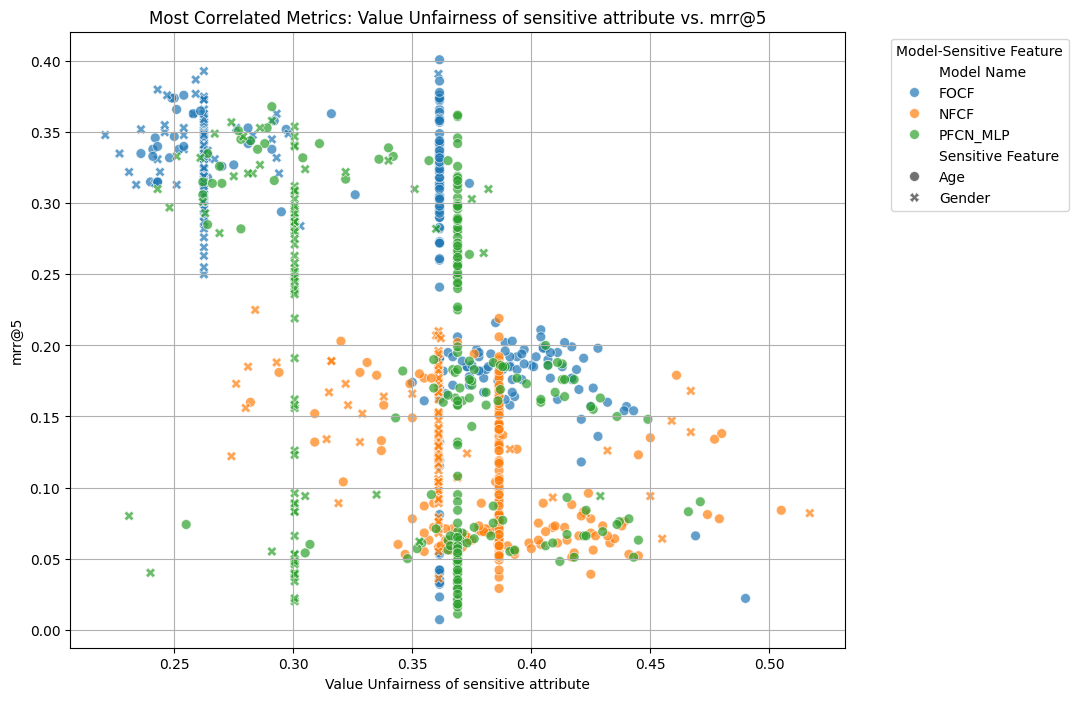

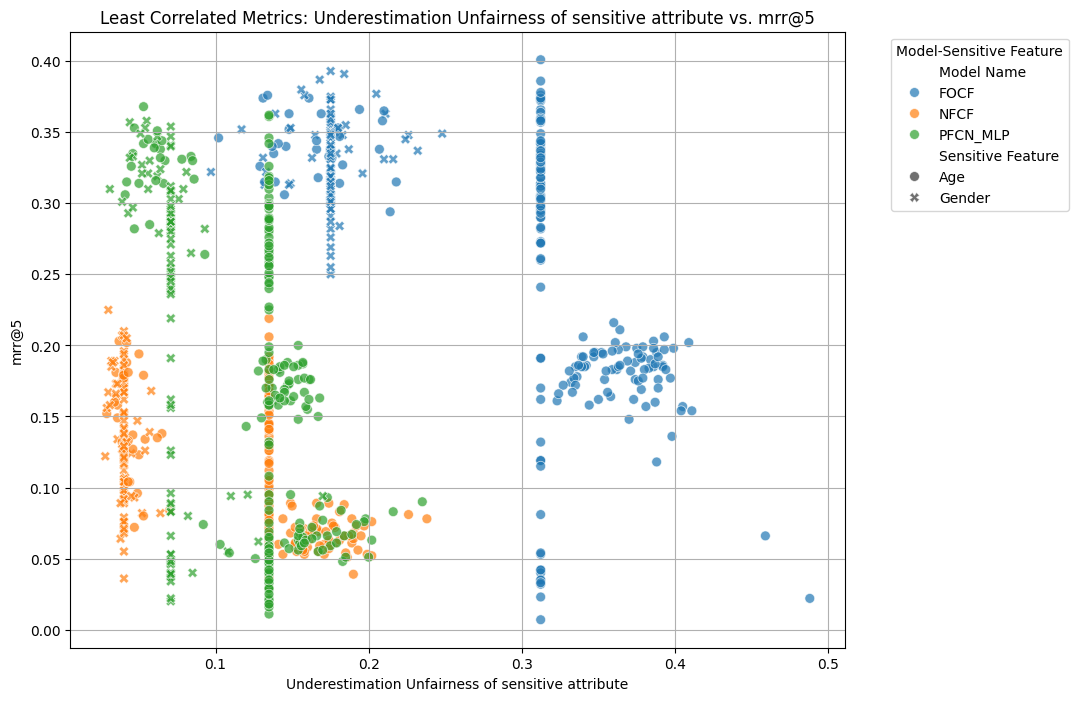

In [126]:
# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Compute correlation matrix
correlations = df[fairness_measures + accuracy_metrics].corr()
fairness_vs_accuracy_corr = correlations.loc[fairness_measures, accuracy_metrics].abs()

# Identify the most and least correlated metrics
most_correlated = fairness_vs_accuracy_corr.stack().idxmax()
least_correlated = fairness_vs_accuracy_corr.stack().idxmin()

most_corr_fairness, most_corr_accuracy = most_correlated
least_corr_fairness, least_corr_accuracy = least_correlated

# Scatter plot for most correlated metrics
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x=most_corr_fairness,
    y=most_corr_accuracy,
    hue="Model Name",
    style="Sensitive Feature",
    s=50,
    alpha=0.7
)
plt.title(f"Most Correlated Metrics: {most_corr_fairness} vs. {most_corr_accuracy}")
plt.xlabel(most_corr_fairness)
plt.ylabel(most_corr_accuracy)
plt.legend(title="Model-Sensitive Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Scatter plot for least correlated metrics
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x=least_corr_fairness,
    y=least_corr_accuracy,
    hue="Model Name",
    style="Sensitive Feature",
    s=50,
    alpha=0.7
)
plt.title(f"Least Correlated Metrics: {least_corr_fairness} vs. {least_corr_accuracy}")
plt.xlabel(least_corr_fairness)
plt.ylabel(least_corr_accuracy)
plt.legend(title="Model-Sensitive Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Calculate model-wise averages
model_averages = df.groupby("Model Name")[fairness_measures + accuracy_metrics].mean()

# Normalize fairness and accuracy metrics (Min-Max normalization)
normalized_data = (model_averages - model_averages.min()) / (model_averages.max() - model_averages.min())

# Separate normalized fairness and accuracy metrics
normalized_fairness = normalized_data[fairness_measures]
normalized_accuracy = normalized_data[accuracy_metrics]

# Calculate overall scores: fairness (lower is better) and accuracy (higher is better)
fairness_score = 1 - normalized_fairness.mean(axis=1)  # Invert fairness scores to align with "higher is better"
accuracy_score = normalized_accuracy.mean(axis=1)

# Combine scores into a single ranking
combined_score = (fairness_score + accuracy_score) / 2

# Add scores to the model averages
model_averages['Fairness Score'] = fairness_score
model_averages['Accuracy Score'] = accuracy_score
model_averages['Combined Score'] = combined_score

# Sort models by combined score
ranked_models = model_averages.sort_values(by='Combined Score', ascending=False)

# Limit to three decimal places
ranked_models = ranked_models.round(3)

# Save the ranked models to a CSV file
ranked_models.to_excel("ranked_models_fairness_accuracy.xlsx", index=True)


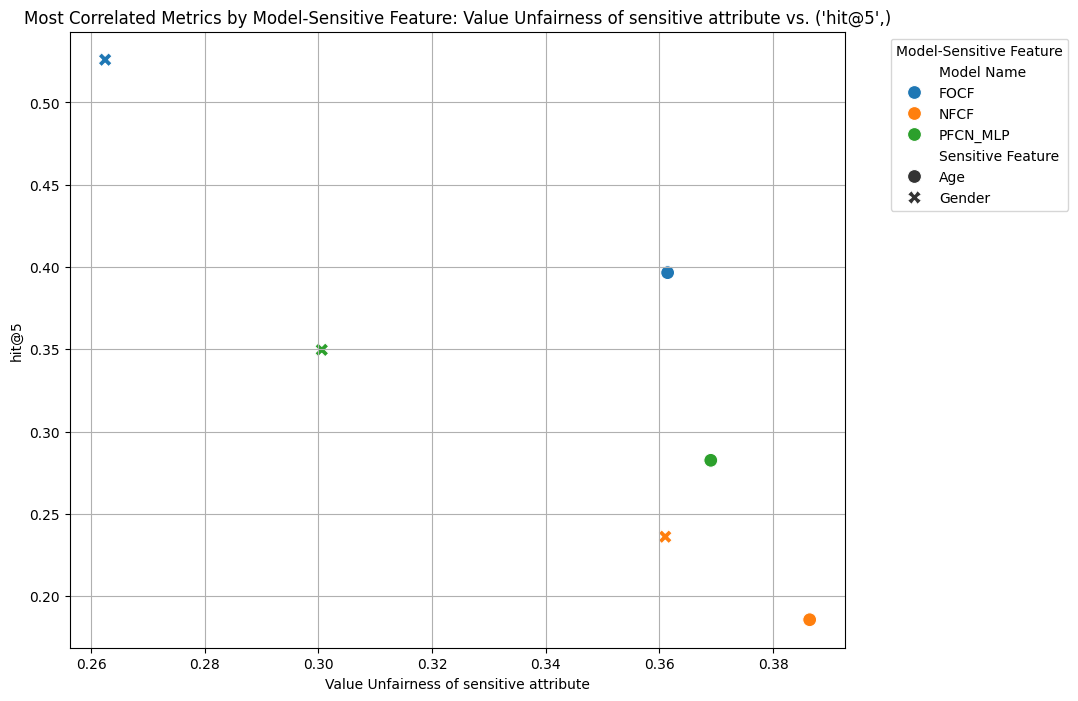

In [128]:

# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Compute correlation matrix and find most correlated metrics
correlations = df[fairness_measures + accuracy_metrics].corr()
fairness_vs_accuracy_corr = correlations.loc[fairness_measures, accuracy_metrics].abs()
most_correlated = fairness_vs_accuracy_corr.stack().idxmax()
most_corr_fairness, most_corr_accuracy = most_correlated

# Calculate averages for each model-sensitive feature pair
model_sensitive_averages = df.groupby(["Model Name", "Sensitive Feature"])[
    fairness_measures + accuracy_metrics
].mean()

# Scatter plot for most correlated metrics by model-sensitive feature
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=model_sensitive_averages['Value Unfairness of sensitive attribute'],
    y=model_sensitive_averages['hit@5'],
    hue=model_sensitive_averages.index.get_level_values(0),  # Model Name
    style=model_sensitive_averages.index.get_level_values(1),  # Sensitive Feature
    s=100
)
plt.title(f"Most Correlated Metrics by Model-Sensitive Feature: {'Value Unfairness of sensitive attribute'} vs. {'hit@5',}")
plt.xlabel('Value Unfairness of sensitive attribute')
plt.ylabel('hit@5')
plt.legend(title="Model-Sensitive Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

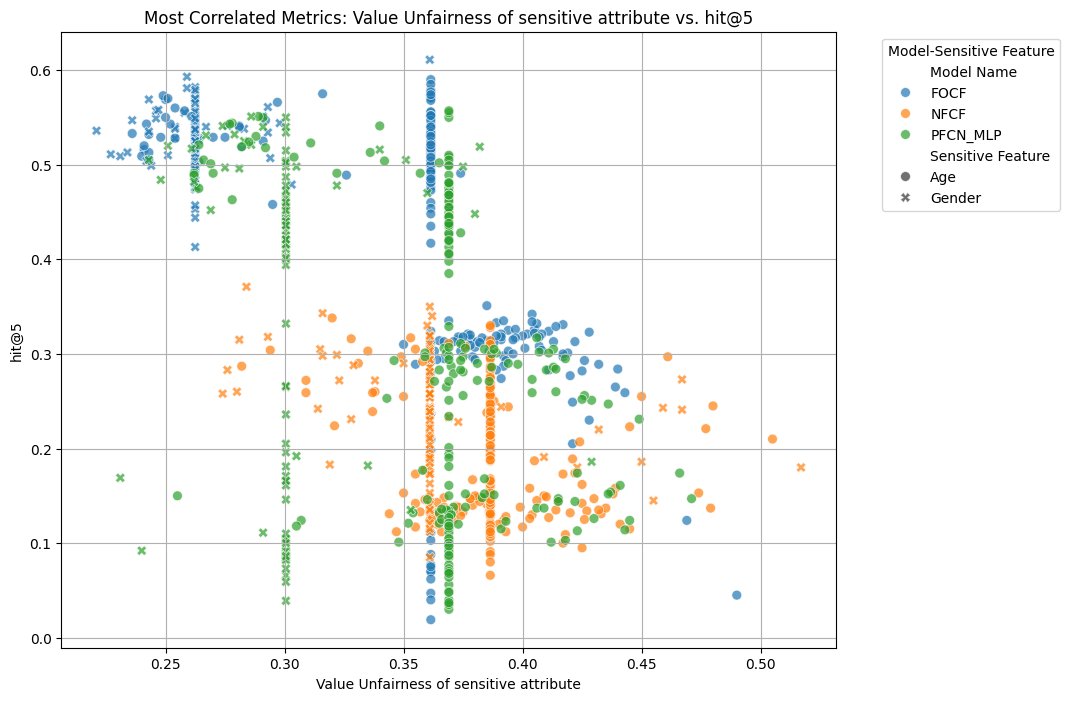

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define fairness and accuracy metrics
fairness_measures = [
    'Value Unfairness of sensitive attribute',
    'Absolute Unfairness of sensitive attribute',
    'Underestimation Unfairness of sensitive attribute',
    'Overestimation Unfairness of sensitive attribute',
    'NonParity Unfairness of sensitive attribute',
    'Absolute Difference',
    'KS Statistic of sensitive attribute',
    'Generalized Cross Entropy',
    'Differential Fairness of sensitive attribute'
]

accuracy_metrics = [
    'ndcg@5',
    'recall@5',
    'mrr@5',
    'hit@5',
]

# Compute correlation matrix
correlations = df[fairness_measures + accuracy_metrics].corr()
fairness_vs_accuracy_corr = correlations.loc[fairness_measures, accuracy_metrics].abs()

# Identify the most and least correlated metrics
most_correlated = fairness_vs_accuracy_corr.stack().idxmax()
least_correlated = fairness_vs_accuracy_corr.stack().idxmin()

most_corr_fairness = 'Value Unfairness of sensitive attribute'
most_corr_accuracy = 'hit@5'

# Scatter plot for most correlated metrics
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x=most_corr_fairness,
    y=most_corr_accuracy,
    hue="Model Name",
    style="Sensitive Feature",
    s=50,
    alpha=0.7
)
plt.title(f"Most Correlated Metrics: {most_corr_fairness} vs. {most_corr_accuracy}")
plt.xlabel(most_corr_fairness)
plt.ylabel(most_corr_accuracy)
plt.legend(title="Model-Sensitive Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

